# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [9]:
import pandas as pd

# Dictionary med farver for partierne
party_colors = {
    "Socialdemokratiet" : "#B32722",
    "Radikale Venstre" : "#713280",
    "Det Konservative Folkeparti" : "#9EBA27",
    "Nye Borgerlige" : "#054F5C",
    "Socialistisk Folkeparti" : "#DC0878",
    "Liberal Alliance" : "#20C6CF",
    "Kristendemokraterne" : "#BABABA",
    "Moderaterne" : "#6C39E5",
    "Dansk Folkeparti" : "#F3CD41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti" : "#00E66A",
    "Venstre" : "#016697",
    "Danmarksdemokraterne" : "#89C3FF",
    "Enhedslisten" : "#ED8019",
    "Alternativet" : "#2B8F39",
    "Løsgænger" : "#cdcdcd"
}

# Indlæs spørgsmålene fra begge medier
alldata = pd.read_excel("alldata.xlsx")
alldata_info = {
    "shape": alldata.shape,
    "columns": alldata.columns,
    "preview": alldata.iloc[:5, :10]
}

alldata_info

{'shape': (867, 53),
 'columns': Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
        '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
        '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
        '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
        '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
        'alder'],
       dtype='object'),
 'preview':    530  531  533  534  535  537  538  540  541  543
 0   -1   -2    1   -2    2    1   -2    1    1    2
 1    2    2   -1   -2   -1   -2    1   -2    2   -2
 2    2    1   -2   -2    1   -2    1   -1    1   -1
 3    2    1   -2   -1    1    1    1    1    1   -2
 4    1    1   -2    2   -2    1   -2    1    2   -2}

In [6]:
import numpy as np

# Lav kopi så originalen forbliver intakt
data = alldata.copy()

# Udtræk alle spørgsmålskolonner: enten helt numeriske eller formater som 1a–12b
question_cols = [col for col in data.columns if isinstance(col, (int, np.integer)) or (isinstance(col, str) and col.strip().endswith(('a', 'b')) and col[0].isdigit())]

# Undersøg mængden af NaN i disse kolonner
nan_counts = data[question_cols].isna().sum().sort_values(ascending=False)
nan_summary = {
    "total_questions": len(question_cols),
    "total_candidates": data.shape[0],
    "questions_with_nans": (nan_counts > 0).sum(),
    "candidates_with_any_nan": data[question_cols].isna().any(axis=1).sum(),
    "mean_nan_per_candidate": data[question_cols].isna().sum(axis=1).mean(),
    "top_10_questions_with_most_nans": nan_counts.head(10)
}

nan_summary


{'total_questions': 24,
 'total_candidates': 867,
 'questions_with_nans': np.int64(0),
 'candidates_with_any_nan': np.int64(0),
 'mean_nan_per_candidate': np.float64(0.0),
 'top_10_questions_with_most_nans': 1a    0
 1b    0
 2a    0
 2b    0
 3a    0
 3b    0
 4a    0
 4b    0
 5a    0
 5b    0
 dtype: int64}

Der er ingen NaN-værdier i spørgsmålskolonnerne – alle 867 kandidater har besvaret alle 24 DR-spørgsmål. Det betyder, vi ikke behøver droppe nogen rækker eller konvertere værdier endnu, da 0 rent faktisk kan betyde "neutral" i skalaen fra -2 til 2.

### Find de spørgsmål med størst uenighed
Spørgsmål hvor kandidaterne virkelig er uenige → disse har stor indflydelse på at placere folk forskelligt. Jeg brugte standardafvigelse som mål.

Jeg analyserede spørgsmålene ud fra deres evne til at differentiere kandidater — både via standardafvigelse og ved at se hvilke spørgsmål der typisk trækker kandidater i hver sin retning. Fx skabte spørgsmål 10b, 6b, 6a, 11b meget uenighed, alle sammen med en spredning på ca. 1.6 og er derfor vigtige for, hvor kandidaterne lander i det politiske landskab.

Når vi kigger i dataene kan vi se at spørgsmål 10b, 6b, 6a og 11b omhandler:
- 10b = Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.
- 6b = Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.
- 6a = Den danske udlændingepolitik er for stram.
- 11b = Det bør undersøges, om Mette Frederiksen kan stilles for en rigsret som konsekvens af hendes håndtering af Mink-sagen.

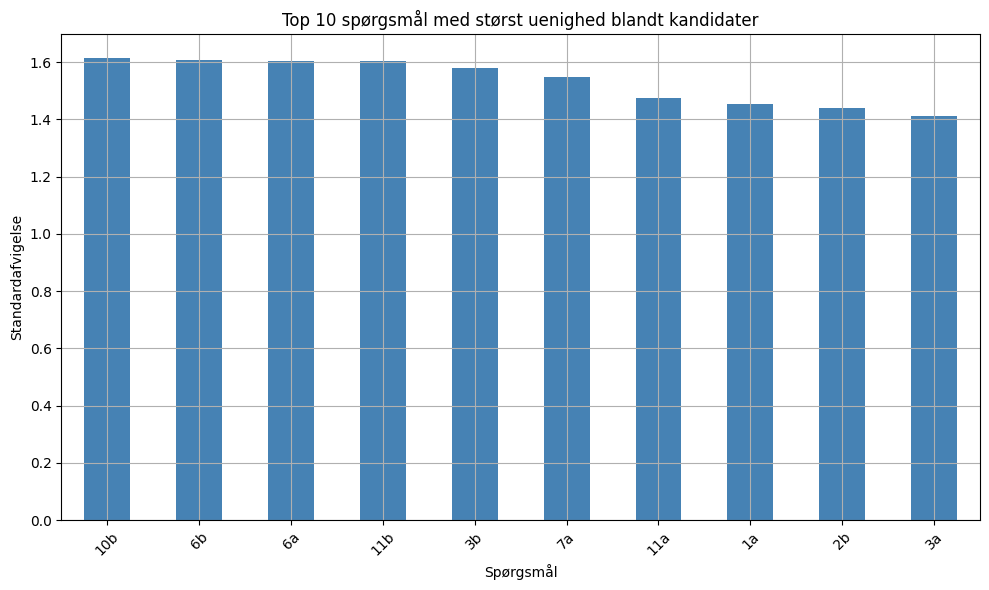

In [11]:
import matplotlib.pyplot as plt

# Beregn standardafvigelse (spredning) pr. spørgsmål
std_per_question = data[question_cols].std().sort_values(ascending=False)

# Top 10 spørgsmål med højest spredning
top10_questions = std_per_question.head(10)

# Plot dem
plt.figure(figsize=(10, 6))
top10_questions.plot(kind="bar", color="steelblue")
plt.title("Top 10 spørgsmål med størst uenighed blandt kandidater")
plt.xlabel("Spørgsmål")
plt.ylabel("Standardafvigelse")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


For at analysere hvilke spørgsmål der er mest afgørende for kandidaternes placering i det politiske landskab, undersøgte jeg standardafvigelsen i svarene. Spørgsmål som 10b (Arnepension), 6a (stram udlændingepolitik) og 11b (Mette Frederiksens ansvar i Mink-sagen) viste sig at skabe stor spredning. Disse emner repræsenterer klassiske ideologiske skillelinjer og spiller en central rolle i at differentiere kandidater og partier fra hinanden.

### Gennemsnitlige partipositioner per spørgsmål
Hvad har de forskellige partier i gennemsnit svaret på hvert spørgsmål - visualiser nogle af dem.

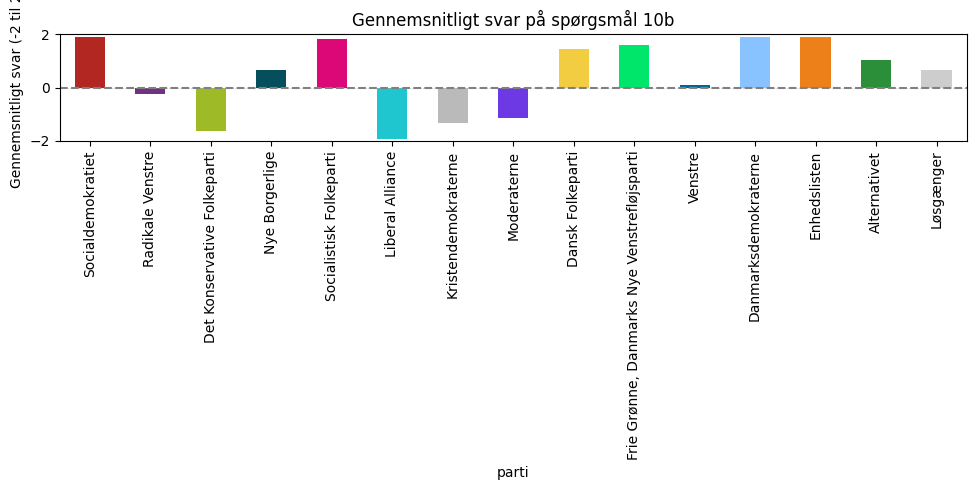

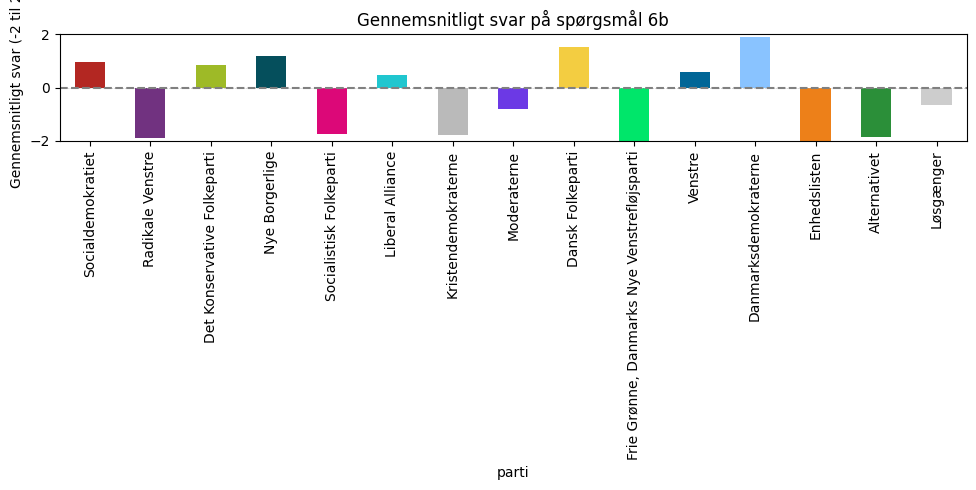

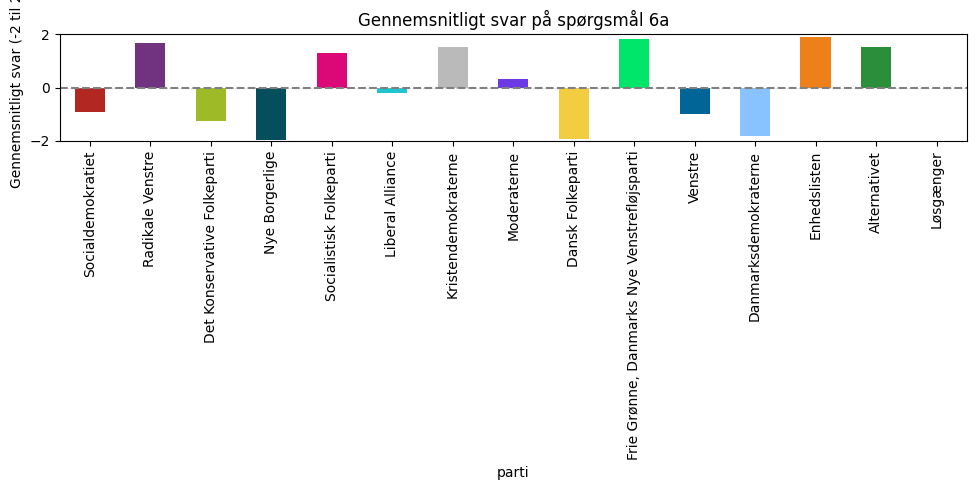

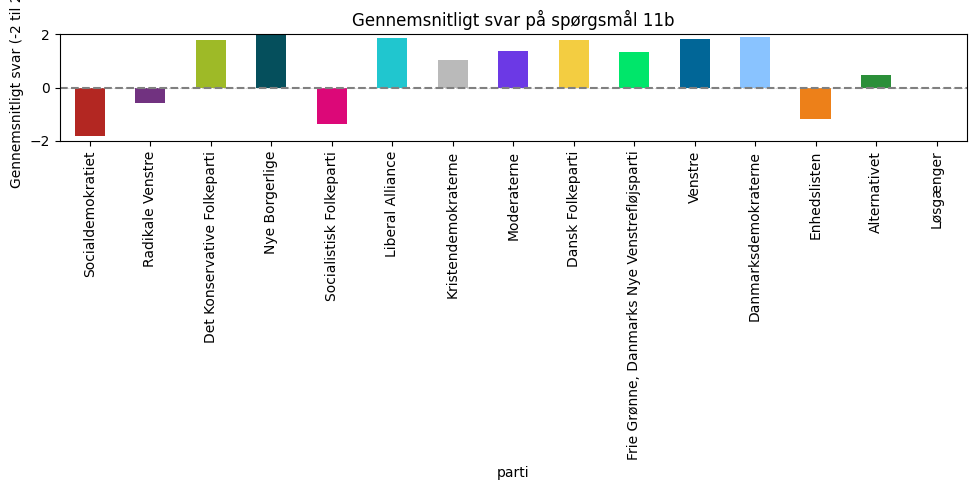

In [15]:
# Grupper data per parti og beregn gennemsnit per spørgsmål
avg_answers = data.groupby("parti")[question_cols].mean()

# Sorter partier politisk
avg_answers = avg_answers.loc[party_colors.keys()]

selected_qs = ["10b", "6b", "6a", "11b"]

for question in selected_qs:
    plt.figure(figsize=(10, 5))
    avg_answers[question].plot(kind="bar", color=[party_colors.get(p, "gray") for p in avg_answers.index])
    plt.title(f"Gennemsnitligt svar på spørgsmål {question}")
    plt.ylabel("Gennemsnitligt svar (-2 til 2)")
    plt.ylim(-2, 2)
    plt.xticks(rotation=90)
    plt.axhline(0, color="gray", linestyle="--")
    plt.grid(True, axis="y", linestyle=":", linewidth=0.5)
    plt.tight_layout()
    plt.show()


Jeg beregnede gennemsnitlige svar pr. spørgsmål for hvert parti. På tværs af flere spørgsmål (6a, 6b, 10b, 11b) ser vi en tydelig skillelinje mellem rød og blå blok. Nogle spørgsmål – som 6a og 6b – fungerer som gode indikatorer for værdipolitisk orientering, mens fx spørgsmål 10b er stærkt fordelingspolitisk. Spørgsmål 11b viser, at også enkeltsager kan differentiere kandidater. Gennemsnitssvarene er derfor en stærk indikator for et partis placering i det politiske landskab.

## Clustering analyse
Formålet med clustering analyseb er at forsøge at gruppere kandidaterne uden at bruge deres parti som label

Formålet er at finde ud af:
- Passer de nuværende partier til den faktiske fordeling af politiske holdninger?
- Er der for mange partier, eller kunne nogle evt. slås sammen?
- Er der kandidater, der ligger “mellem partier”?

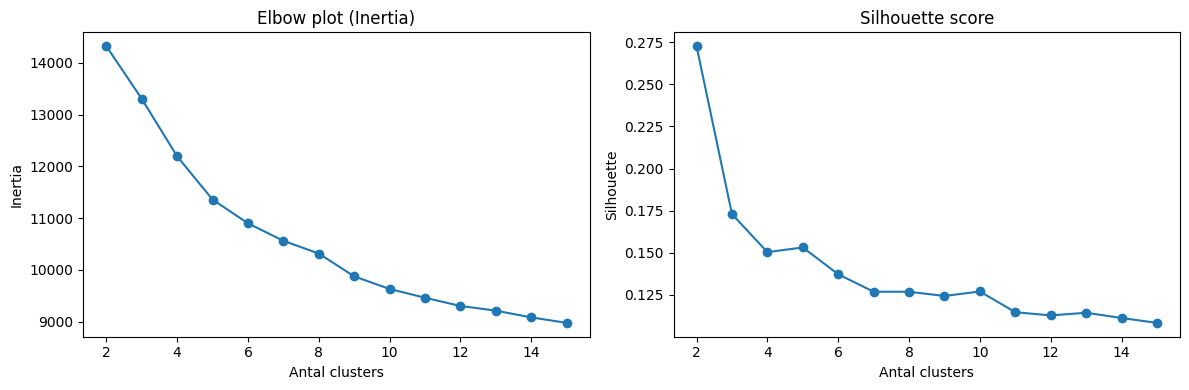

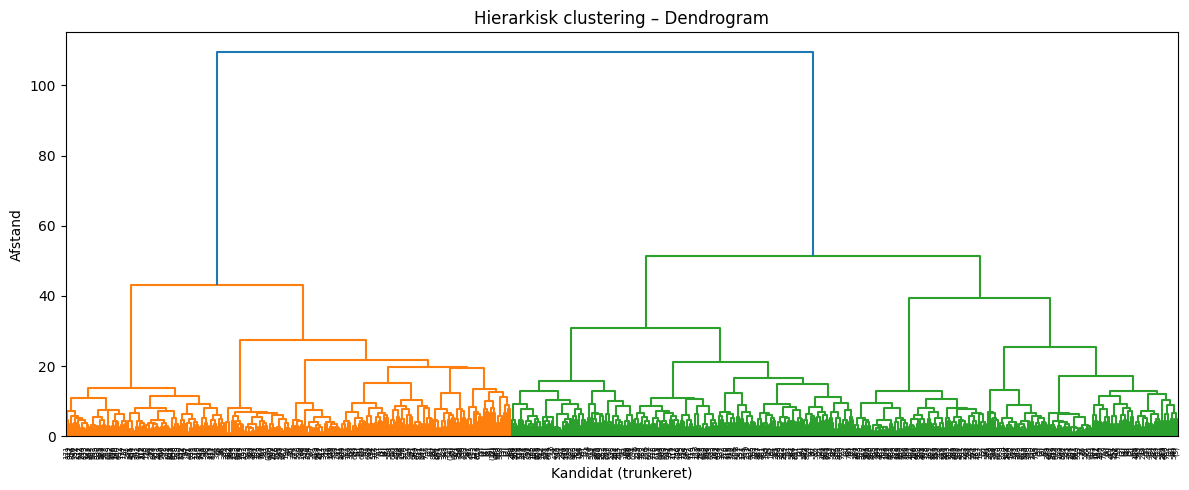

Antal fundne klynger: 7
Antal støj-kandidater: 739


In [17]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Behold kun spørgsmålskolonner og fjern NaNs
cluster_data = data[question_cols].dropna()
cluster_scaled = StandardScaler().fit_transform(cluster_data)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test forskellige antal k
inertia = []
silhouette = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(cluster_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(cluster_scaled, labels))

# Plot inertia (elbow) og silhouette
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow plot (Inertia)")
plt.xlabel("Antal clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.title("Silhouette score")
plt.xlabel("Antal clusters")
plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 5))
linked = linkage(cluster_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=10)
plt.title("Hierarkisk clustering – Dendrogram")
plt.xlabel("Kandidat (trunkeret)")
plt.ylabel("Afstand")
plt.tight_layout()
plt.show()

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(cluster_scaled)

# Antal unikke klynger (inkl. -1 = støj)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Antal fundne klynger: {n_clusters}")
print(f"Antal støj-kandidater: {n_noise}")
